In [1]:
#hack till I make it a real package..
import os
import sys
sys.path.append("../../")

#using GPU, comment out if on CPU?
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
import jax 
jax.config.update('jax_disable_jit', False)


In [2]:
import diffhydro as dh
from diffhydro.utils.io import athinput,athdf


In [3]:
#change to your sim location!
athena_outputs_loc = "/home/ben.horowitz/DiffHydro/tests/athena_ref_outputs/kh-slip/"

ic_filename = "kh-slip.out2.00000.athdf"

ICs = athdf(athena_outputs_loc+ic_filename)


In [4]:
ICs["mom2"].shape

(1, 128, 256)

In [5]:
#manually map from athena file to my format

import jax.numpy as jnp
sol = jnp.zeros((5,128,256))

sol = sol.at[0].set(ICs["dens"][0])
sol = sol.at[1].set(ICs["mom2"][0])
sol = sol.at[2].set(ICs["mom1"][0])
sol = sol.at[3].set(ICs["mom3"][0])
sol = sol.at[-1].set(ICs["Etot"][0])

2025-10-24 11:57:54.208944: W external/xla/xla/service/gpu/nvptx_compiler.cc:893] The NVIDIA driver's CUDA version is 12.6 which is older than the PTX compiler version 12.9.86. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


In [45]:
eq = dh.equationmanager.EquationManager()
eq.cfl=0.3
#eq.box_size = (128.0, 256.0,1.0)
ss = dh.signal_speed_Rusanov
solver = dh.HLLC(equation_manager=eq,signal_speed=ss)
cf = dh.ConvectiveFlux(eq,solver,dh.MUSCL3(limiter="VANLEER"))
hydrosim = dh.hydro(n_super_step=1950,fluxes=[cf],splitting_schemes=[[2,1,1,2],[1,2,2,1],])

In [46]:

params = {}
q = hydrosim.evolve(sol,params)

dt [Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=1/0)>, 10000000000.0]


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


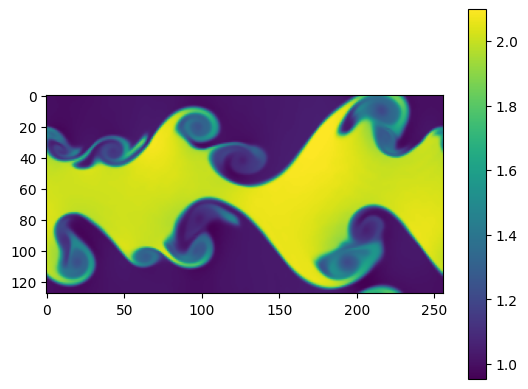

In [48]:
#looks bad
%pylab inline

imshow(q[0][0])
#imshow(hydrosim.outputs[-1][0][0][-1]-ICs["Etot"][0])#,vmin=-1E-4,vmax=1E-4)
colorbar()
show()

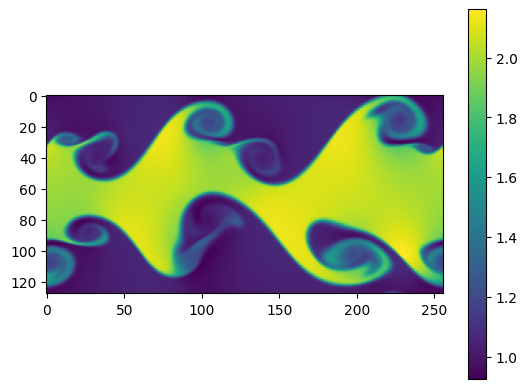

In [49]:
#not the exact matching timeslice, but close enough....
t1_filename = "kh-slip.out2.02810.athdf"

t1s = athdf(athena_outputs_loc+t1_filename)

imshow(t1s["dens"][0])
colorbar()

In [10]:
#in practice the initialization locations are somewhat susceptable to numerical noise and/or solver method...
#for solver in loop, we start training a couple of timesteps in so we don't need to solver for that...

In [60]:
hydrosim = dh.hydro(n_super_step=1950*2,fluxes=[cf],use_mol=True,integrator="RK2")

In [ ]:

params = {}
q_MOL = hydrosim.evolve(sol,params)

dt [Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=1/0)>, 10000000000.0]


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


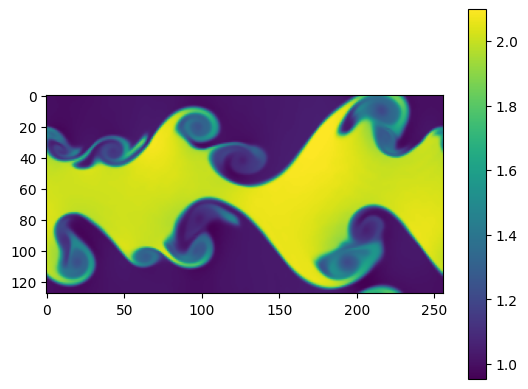

In [52]:
#looks bad
%pylab inline

imshow(q[0][0])
#imshow(hydrosim.outputs[-1][0][0][-1]-ICs["Etot"][0])#,vmin=-1E-4,vmax=1E-4)
colorbar()
show()

In [ ]:
#looks bad
%pylab inline

imshow(q_MOL[0][0])
#imshow(hydrosim.outputs[-1][0][0][-1]-ICs["Etot"][0])#,vmin=-1E-4,vmax=1E-4)
colorbar()
show()